In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


In [27]:
# Upload files
from google.colab import files
uploaded = files.upload()


Saving gender_submission.csv to gender_submission.csv
Saving test.csv to test.csv
Saving train.csv to train (1).csv


In [48]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')



In [4]:
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
print(train_df['Survived'].value_counts())
print(train_df['Pclass'].value_counts())
print(train_df['Sex'].value_counts())

Survived
0    549
1    342
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Sex
male      577
female    314
Name: count, dtype: int64


In [8]:
train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


*   Age has missing values
*   Cabin has missing values
*   Embarked has missing values

In [49]:


train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)

test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)


train_df.drop('Cabin', axis=1, inplace=True)
test_df.drop('Cabin', axis=1, inplace=True)


<ipython-input-49-ef86464af033>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
<ipython-input-49-ef86464af033>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [30]:

label = LabelEncoder()
train_df['Sex'] = label.fit_transform(train_df['Sex'])
test_df['Sex'] = label.transform(test_df['Sex'])

train_df['Embarked'] = label.fit_transform(train_df['Embarked'])
test_df['Embarked'] = label.transform(test_df['Embarked'])


In [31]:
train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


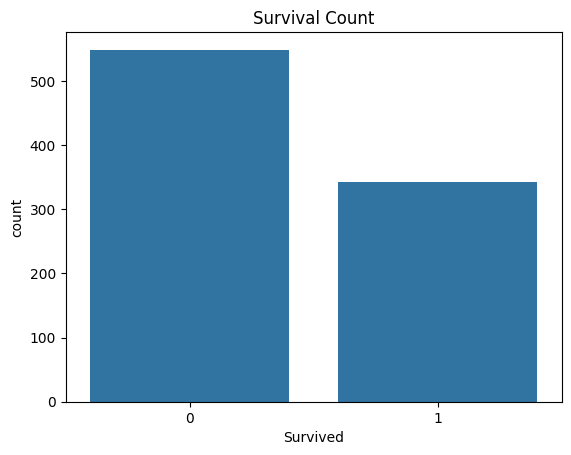

In [32]:
sns.countplot(x='Survived', data=train_df)
plt.title('Survival Count')
plt.show()

Observation:More People died

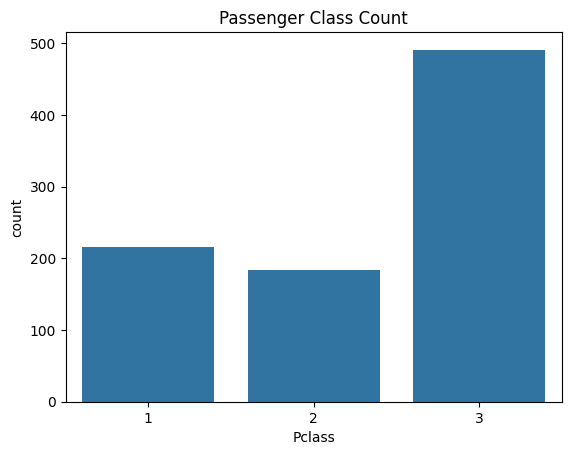

In [33]:
sns.countplot(x='Pclass', data=train_df)
plt.title('Passenger Class Count')
plt.show()

More passengers in class 3

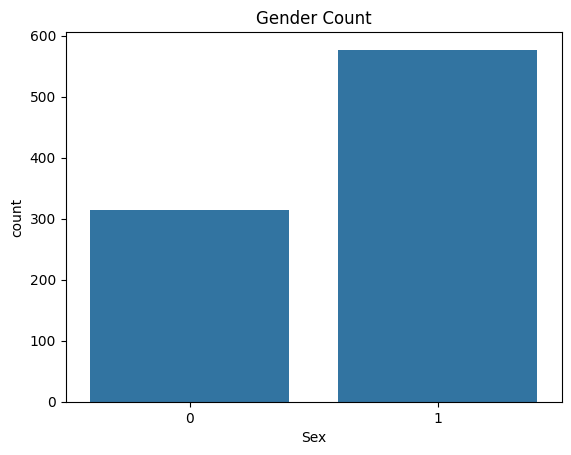

In [34]:
sns.countplot(x='Sex', data=train_df)
plt.title('Gender Count')
plt.show()

More Male Passengers

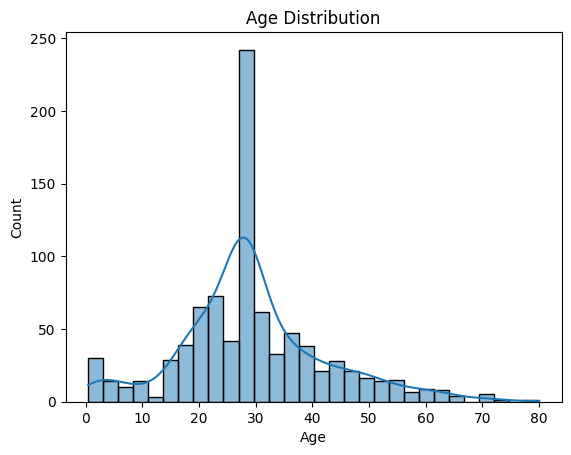

In [35]:
sns.histplot(train_df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

Most Passengers were young and adults

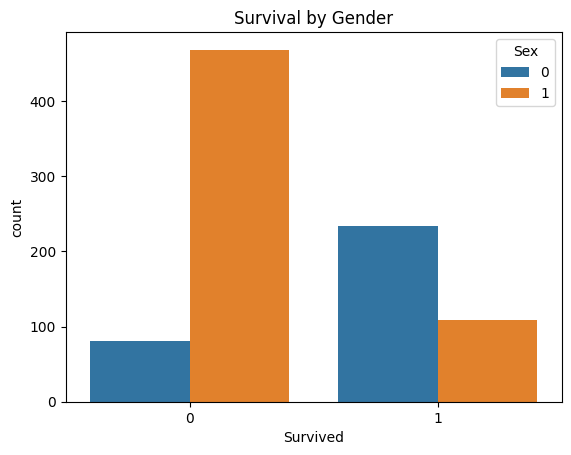

In [36]:
sns.countplot(x='Survived', hue='Sex', data=train_df)
plt.title('Survival by Gender')
plt.show()

Females survived more than males

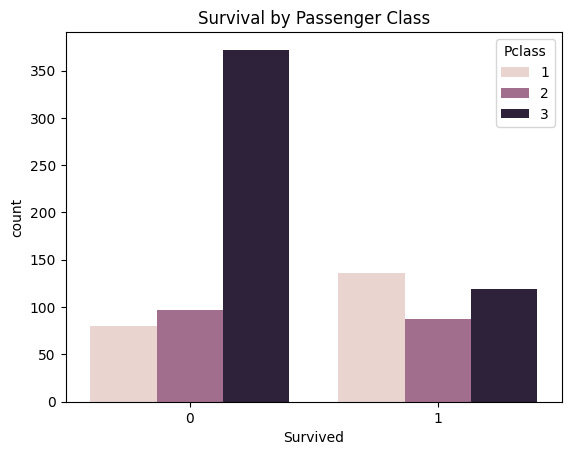

In [37]:
sns.countplot(x='Survived', hue='Pclass', data=train_df)
plt.title('Survival by Passenger Class')
plt.show()

1st class passengers survived more

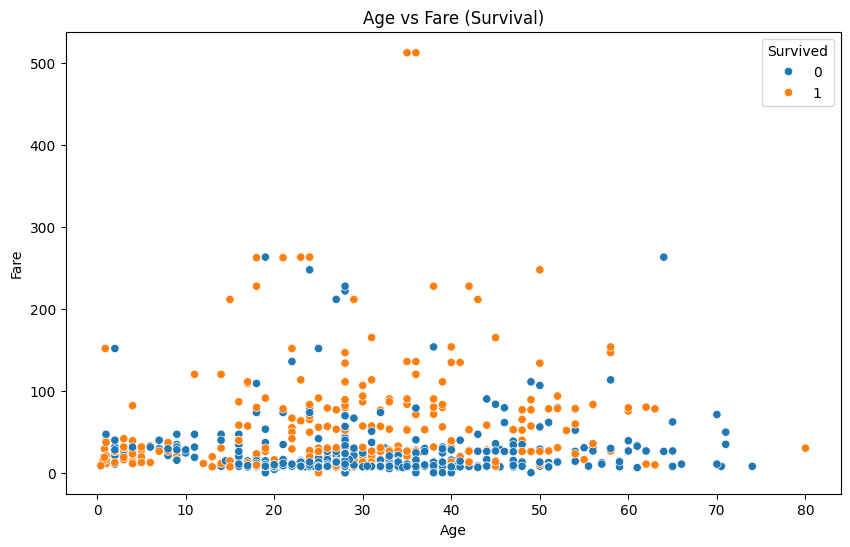

In [38]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train_df)
plt.title('Age vs Fare (Survival)')
plt.show()

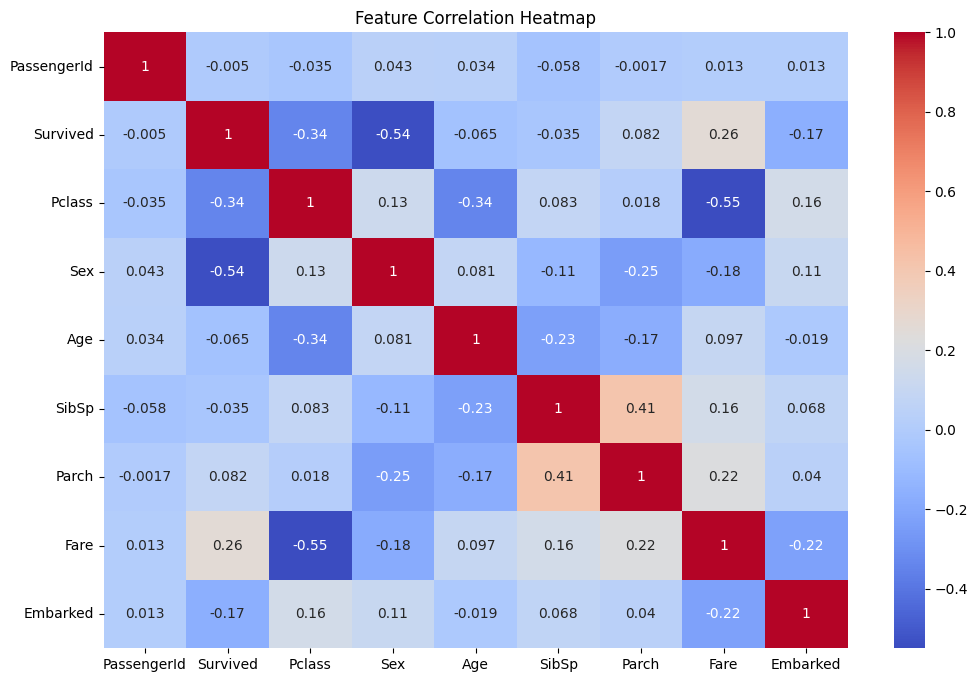

In [39]:
numeric_df=train_df.select_dtypes(include=['number'])

numeric_df=numeric_df.dropna()

corr_matrix=numeric_df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


*   Fare and Pclass have some correlation survived
*   Age has very weak correlation



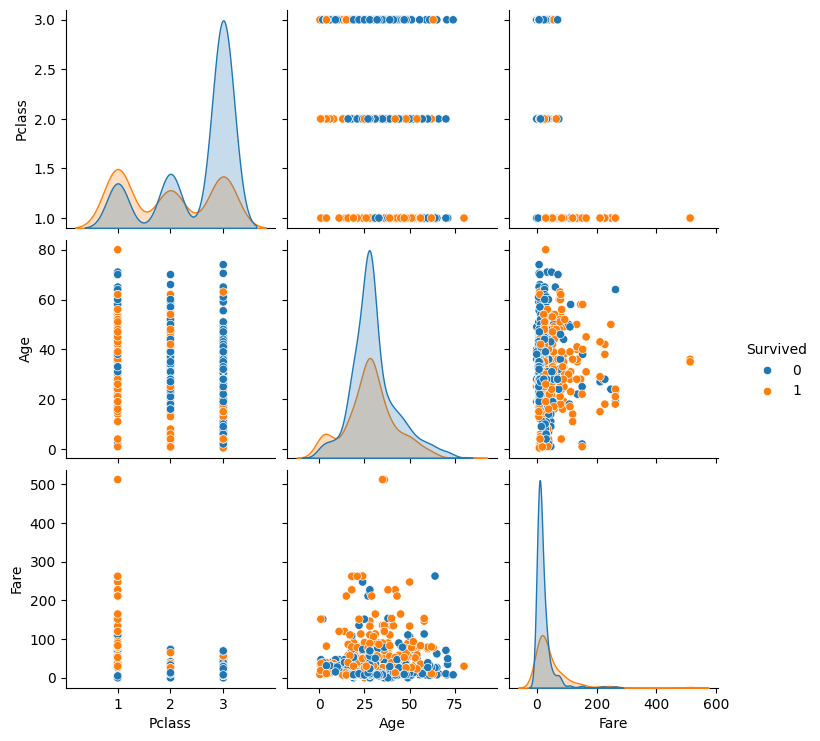

In [40]:
sns.pairplot(train_df[['Survived', 'Pclass', 'Age', 'Fare']], hue='Survived')
plt.show()

Clear Pattern by Pclass and Fare

In [41]:
summary = """
1. Women had much higher survival rates than men.
2. 1st class passengers survived more than 2nd and 3rd class.
3. Younger passengers had slightly better survival chances.
4. Higher fares were associated with survival (richer passengers survived more).
5. Missing data were mainly in 'Age', 'Embarked', and 'Cabin'.
6. 'Cabin' was dropped because too many missing values.
"""
print(summary)



1. Women had much higher survival rates than men.
2. 1st class passengers survived more than 2nd and 3rd class.
3. Younger passengers had slightly better survival chances.
4. Higher fares were associated with survival (richer passengers survived more).
5. Missing data were mainly in 'Age', 'Embarked', and 'Cabin'.
6. 'Cabin' was dropped because too many missing values.



DATA MODELLING

In [50]:

train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_df['Title'] = test_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

for df in [train_df, test_df]:
    df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col',\
                                       'Don', 'Dr', 'Major', 'Rev', 'Sir',\
                                       'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')


In [51]:

for df in [train_df, test_df]:
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [52]:

label = LabelEncoder()

train_df['Sex'] = label.fit_transform(train_df['Sex'])
test_df['Sex'] = label.transform(test_df['Sex'])

train_df['Embarked'] = label.fit_transform(train_df['Embarked'])
test_df['Embarked'] = label.transform(test_df['Embarked'])

train_df['Title'] = label.fit_transform(train_df['Title'])
test_df['Title'] = label.transform(test_df['Title'])


In [53]:

train_df.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)
test_passenger_id = test_df['PassengerId']  # Save for submission
test_df.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)


In [54]:


X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

X_test_final = test_df


In [55]:

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [56]:

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [57]:

y_pred_val = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred_val)
print(f'Validation Accuracy: {accuracy:.2f}')


Validation Accuracy: 0.83


In [58]:

test_predictions = model.predict(X_test_final)


In [59]:

submission = pd.DataFrame({
    "PassengerId": test_passenger_id,
    "Survived": test_predictions
})

submission.to_csv("submission_improved.csv", index=False)
print("Improved submission file created successfully!")


Improved submission file created successfully!


<ipython-input-60-8095a88a1514>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


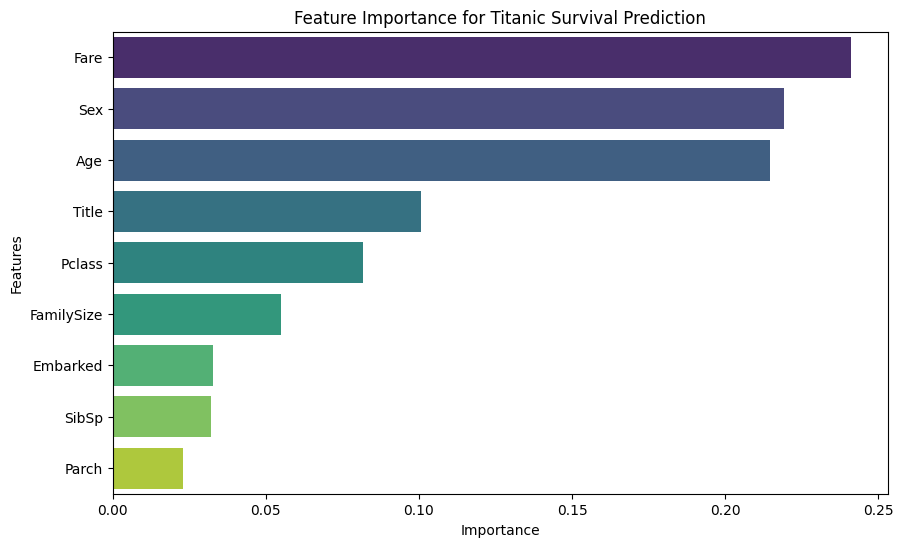

In [60]:
importances = model.feature_importances_


feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance for Titanic Survival Prediction')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()
